In [27]:
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

In [5]:
def read_model_file(file_path: Path):
    model_ = file_path.read_text().splitlines()
    model_ = [line.split(": ") for line in model_[1:]]
    model_ = {key: float(val) for (key,val) in model_}

    model = {}
    model["root_length"] = int(model_.get("Root_length"))
    model["rate_insertion"] = model_.get("R_I") or model_.get("R_ID")
    model["rate_deletion"] = model_.get("R_D") or model_.get("R_ID")
    model["length_param_insertion"] = model_.get("A_I") or model_.get("A_ID")
    model["length_param_deletion"] = model_.get("A_D") or model_.get("A_ID")

    return model

In [3]:
MAIN_DIR = Path("data_fast").resolve()
datasets = sorted(list(MAIN_DIR.iterdir()))


In [14]:
params = {
            'root_length': [], 'root_length_infered': [],
            'rate_insertion': [], 'rate_insertion_infered': [],
            'rate_deletion': [], 'rate_deletion_infered': [],
            'length_param_insertion':[], 'length_param_insertion_infered':[],
            'length_param_deletion': [], 'length_param_deletion_infered': []
        }

for folder in datasets:
    model_files = list(folder.glob("*_params.txt"))
    true_model = read_model_file(model_files[1])
    infered_model = read_model_file(model_files[0])
    for key,val in infered_model.items():
        params[f"{key}_infered"].append(val)
        params[f"{key}"].append(true_model[key])


params_df = pd.DataFrame(params)

In [28]:
stats.pearsonr(params_df[p], params_df[p_inf])

PearsonRResult(statistic=np.float64(0.5372666221897915), pvalue=np.float64(5.448451065798253e-12))

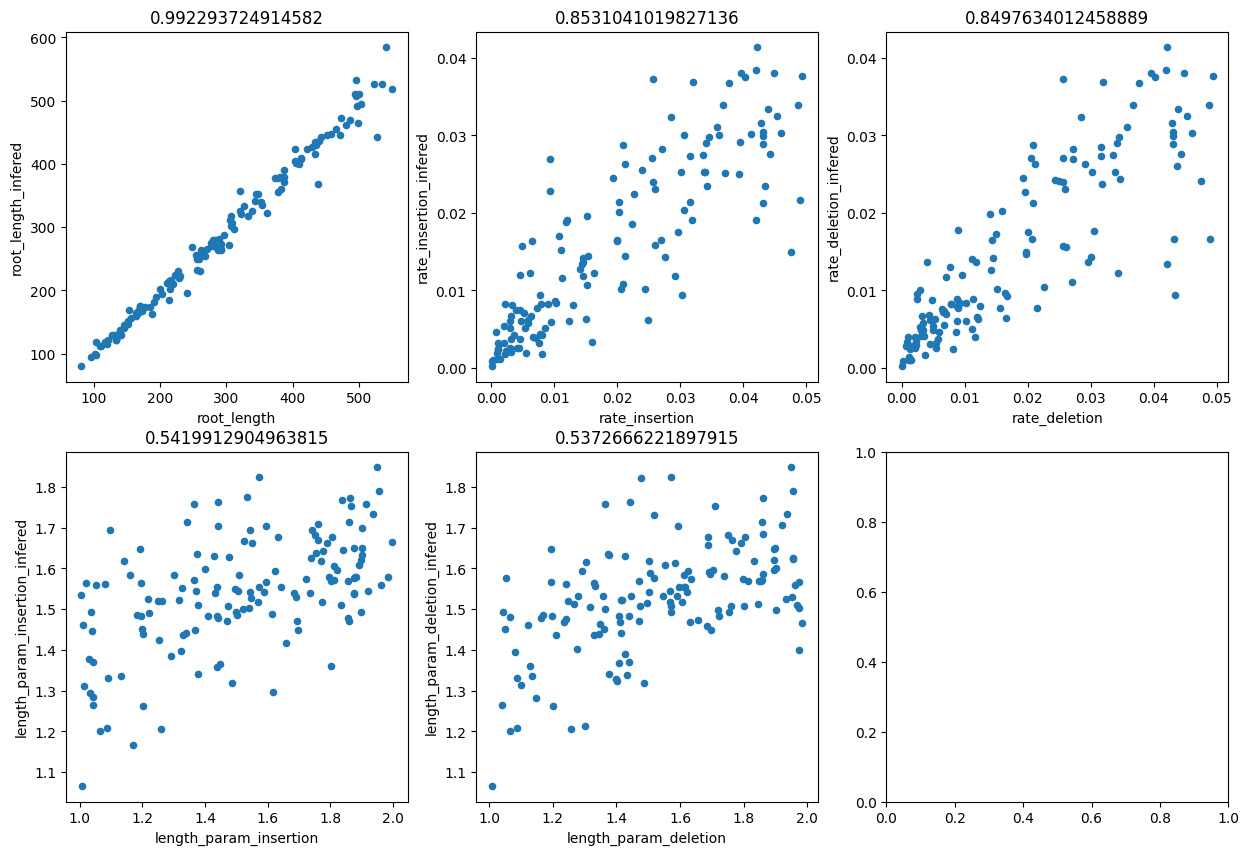

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes: list[plt.Axes] = axes.flatten()  # Flatten to make indexing easier

param_pairs = [
    ('root_length', 'root_length_infered'),
    ('rate_insertion', 'rate_insertion_infered'),
    ('rate_deletion', 'rate_deletion_infered'),
    ('length_param_insertion', 'length_param_insertion_infered'),
    ('length_param_deletion', 'length_param_deletion_infered')
]

for i,(p,p_inf) in enumerate(param_pairs):
    
    params_df.plot(kind="scatter", x=p, y=p_inf, ax=axes[i])
    axes[i].set_title(stats.pearsonr(params_df[p], params_df[p_inf])[0])